# Import Libraries

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import timedelta
from shared_code import utils
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Load Data

In [158]:
df = pd.read_pickle("cleaned.pkl")
df.describe()

,constructionYear,daysActive,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber
count,72310.000000,72310.000000,72310.000000,72310.000000,7.231000e+04,72310.0000,72310.000000,7.231000e+04,7.231000e+04,7.231000e+04,72310.000000,72310.000000,72310.000000
mean,1934.654031,19.416844,59.331957,18.052754,5.426169e+06,2730.3896,93067.447435,4.614881e+05,1.877872e+03,4.964681e+06,58.831855,2.263719,2.973127
std,36.803539,30.272165,0.013061,0.027723,3.208840e+06,1252.9658,20317.954878,5.272716e+05,5.020353e+05,3.085057e+06,29.127305,1.004937,2.131183
min,1336.000000,0.000000,59.279156,17.873617,1.028000e+06,1.0000,14082.000000,-6.029043e+06,-7.430000e+01,2.000000e+00,10.000000,1.000000,-3.000000
25%,1913.000000,11.000000,59.318580,18.033085,3.370000e+06,1866.0000,79186.000000,1.500000e+05,3.300000e+00,2.995000e+06,38.000000,2.000000,1.500000
50%,1930.000000,13.000000,59.334995,18.051073,4.500000e+06,2484.0000,91429.000000,4.050000e+05,1.020000e+01,3.995000e+06,52.000000,2.000000,3.000000
75%,1942.000000,18.000000,59.342323,18.077312,6.500000e+06,3377.7500,105000.000000,6.700000e+05,1.700000e+01,5.975000e+06,74.000000,3.000000,4.000000
max,2023.000000,1496.000000,59.373188,18.140323,7.000000e+07,35803.0000,302013.000000,1.500000e+07,1.349999e+08,7.500000e+07,354.000000,10.000000,99.900000


## Dropping Unnecessary Columns

In [159]:
df = df.drop(["streetAddress", "objectType", "soldPriceType", "url"], axis = 1)
df.head()

,constructionYear,descriptiveAreaName,daysActive,soldDate,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber
booliId,,,,,,,,,,,,,,,
1313807,1932.0,St Göran,13.0,2012-11-28,59.336983,18.024736,2110000,1708.0,57027.0,110000.0,5.5,2000000.0,37.0,1.5,2.0
1275300,1930.0,Kungsholmen,17.0,2012-10-07,59.338768,18.022543,2005000,1759.0,66833.0,10000.0,0.5,1995000.0,30.0,1.0,5.0
1290019,1912.0,Kungsholmen,14.0,2012-10-24,59.330952,18.029498,3980000,1295.0,65246.0,185000.0,4.9,3795000.0,61.0,2.0,3.0
1317787,1997.0,Kungsholmen,12.0,2012-12-05,59.333504,18.042007,3700000,4166.0,53237.0,105000.0,2.9,3595000.0,69.5,2.5,2.0
1281194,1984.0,Södermalm,11.0,2012-10-09,59.314210,18.079580,3400000,3194.0,57627.0,150000.0,4.6,3250000.0,59.0,2.0,1.0


# 1. Feature Engineering

In [160]:
category_columns = ["descriptiveAreaName"]
date_columns = ["soldDate"]
value_columns = ["constructionYear", "daysActive", "latitude", "longitude", "soldPriceInSek", "rentInSek", "soldSqmPriceInSek", "soldPriceVsListPriceDiffInSek", "soldPriceVsListPriceDiffInPercentage", "listPriceInSek", "livingAreaInSqm", "numberOfRooms", "floorNumber"]

## Categorical Data

In [161]:
df_category = df[category_columns]
df_category.head()

,descriptiveAreaName
booliId,
1313807,St Göran
1275300,Kungsholmen
1290019,Kungsholmen
1317787,Kungsholmen
1281194,Södermalm


In [162]:
df_category_area = pd.DataFrame({"Area samples": df_category.value_counts()})
df_category_area.head(30)

,Area samples
descriptiveAreaName,
Vasastan,14638
Kungsholmen,13766
Södermalm,12108
Östermalm,7654
Gärdet,3128
Katarina,1159
Södermalm Katarina,901
Norrmalm,693
Essingeöarna,691


Dropping areas with to few data points (less then 50 say)

In [163]:
to_replace = list(df_category_area[df_category_area["Area samples"] < 50].index)
df_category["descriptiveAreaName_new"] = df_category["descriptiveAreaName"].replace(to_replace, "null_descriptiveAreaName")
df_category.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6540\109137872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category["descriptiveAreaName_new"] = df_category["descriptiveAreaName"].replace(to_replace, "null_descriptiveAreaName")


,descriptiveAreaName,descriptiveAreaName_new
booliId,,
1313807,St Göran,St Göran
1275300,Kungsholmen,Kungsholmen
1290019,Kungsholmen,Kungsholmen
1317787,Kungsholmen,Kungsholmen
1281194,Södermalm,Södermalm


In [164]:
df_category = pd.get_dummies(df_category["descriptiveAreaName_new"], prefix = "area")
df_category.drop(columns = ["area_null_descriptiveAreaName"], inplace = True)
df_category.head()

,area_Birkastan,area_Birkastan Vasastan,area_Centrum,area_Centrum Norrmalm Vasastan,area_City,area_Ekhagen,area_Essingeöarna,area_Fredhäll,area_Fridhemsplan,area_Gamla Stan,area_Gärdet,area_Gårdshus,area_Hagamalm,area_Hagastaden,area_Hagastaden Vasastan,area_Hjorthagen,area_Hornsbergs Strand,area_Hornstull,area_Högalid,area_Högst,area_Katarina,area_Katarina/Sofia,area_Kristineberg,area_Kungsholmen,area_Kungsholmen Fredhäll,area_Kungsholmen Fridhemsplan,area_Kungsholmen Hornsbergs Strand,area_Kungsholmen Kristineberg,area_Kungsholmen Lilla Essingen,area_Kungsholmen Nedre,area_Kungsholmen Norr Mälarstrand,area_Kungsholmen Rådhuset,area_Kungsholmen Thorildsplan,area_Kungsholmen-Hornsbergs Strand,area_Lilla Essingen,area_Lilla Essingen - Kungsholmen,area_Lilla Essingen Kungsholmen,area_Maria,area_Maria/Gamla Stan/Högalid,area_Mariaberget,area_Mariatorget,area_Nedre Gärdet,area_Nedre Kungsholmen,area_Norr Mälarstrand,area_Norra Djurgården,area_Norra Djurgårdsstaden,area_Norrmalm,area_Odenplan,area_Reimersholme,area_Sabbatsberg/Atlas,area_Sibirien,area_Sofia,area_St Erik,area_St Göran,area_Stora Essingen,area_Södermalm,area_Södermalm Hornstull,area_Södermalm Högalid,area_Södermalm Katarina,area_Södermalm Maria,area_Södermalm Maria Magdalena,area_Södermalm SoFo,area_Södermalm Sofia,area_Södermalm-Högalid,area_Södermalm-Katarina,area_Södermalm-Maria,area_Södermalm-Sofia,area_Södermalm-Sofo,area_Thorildsplan,area_Tule,area_Tullgården,area_Vasastan,area_Vasastan - Birkastan,area_Vasastan - Odenplan,area_Vasastan Birkastan,area_Vasastan Norrmalm,area_Vasastan Odenplan,area_Vasastan Sibirien,area_Vasastan Östermalm,area_Östermalm,area_Östermalm / Gärdet,area_Östermalm / Nedre Gärdet,area_Östermalm Gärdet,area_Östra Kungsholmen
booliId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1313807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1275300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1290019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1317787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1281194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Features from soldDate

In [165]:
date_columns = ["soldDate"]
df_dates = df[date_columns]
df_dates.head()

,soldDate
booliId,
1313807,2012-11-28
1275300,2012-10-07
1290019,2012-10-24
1317787,2012-12-05
1281194,2012-10-09


In [166]:
df_dates["soldMonth"] = df_dates["soldDate"].dt.month
df_dates["soldDayOfWeek"] = df_dates["soldDate"].dt.dayofweek
df_dates["soldWeekOfYear"] = df_dates["soldDate"].dt.week
df_dates["soldQuarter"] = df_dates["soldDate"].dt.quarter

df_dates["dateOnMarket"] = df_dates["soldDate"] - pd.to_timedelta(df.daysActive, unit = "D")
df_dates["marketDayOfWeek"] = df_dates["dateOnMarket"].dt.dayofweek

df_dates.drop(columns = ["soldDate", "dateOnMarket"], inplace = True)
df_dates.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6540\831076301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates["soldMonth"] = df_dates["soldDate"].dt.month
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6540\831076301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates["soldDayOfWeek"] = df_dates["soldDate"].dt.dayofweek
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6540\831076301.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have b

,soldMonth,soldDayOfWeek,soldWeekOfYear,soldQuarter,marketDayOfWeek
booliId,,,,,
1313807,11,2,48,4,3
1275300,10,6,40,4,3
1290019,10,2,43,4,2
1317787,12,2,49,4,4
1281194,10,1,41,4,4


## Log Transformation

In [167]:
df_values = df[value_columns]
df_values.describe()

,constructionYear,daysActive,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber
count,72310.000000,72310.000000,72310.000000,72310.000000,7.231000e+04,72310.0000,72310.000000,7.231000e+04,7.231000e+04,7.231000e+04,72310.000000,72310.000000,72310.000000
mean,1934.654031,19.416844,59.331957,18.052754,5.426169e+06,2730.3896,93067.447435,4.614881e+05,1.877872e+03,4.964681e+06,58.831855,2.263719,2.973127
std,36.803539,30.272165,0.013061,0.027723,3.208840e+06,1252.9658,20317.954878,5.272716e+05,5.020353e+05,3.085057e+06,29.127305,1.004937,2.131183
min,1336.000000,0.000000,59.279156,17.873617,1.028000e+06,1.0000,14082.000000,-6.029043e+06,-7.430000e+01,2.000000e+00,10.000000,1.000000,-3.000000
25%,1913.000000,11.000000,59.318580,18.033085,3.370000e+06,1866.0000,79186.000000,1.500000e+05,3.300000e+00,2.995000e+06,38.000000,2.000000,1.500000
50%,1930.000000,13.000000,59.334995,18.051073,4.500000e+06,2484.0000,91429.000000,4.050000e+05,1.020000e+01,3.995000e+06,52.000000,2.000000,3.000000
75%,1942.000000,18.000000,59.342323,18.077312,6.500000e+06,3377.7500,105000.000000,6.700000e+05,1.700000e+01,5.975000e+06,74.000000,3.000000,4.000000
max,2023.000000,1496.000000,59.373188,18.140323,7.000000e+07,35803.0000,302013.000000,1.500000e+07,1.349999e+08,7.500000e+07,354.000000,10.000000,99.900000


In [168]:
def set_log_transform_on_column(df, columns):
    for col in columns:
        df[col] = np.log10(df[col] + 1)
        
    return df

log_columns = ["daysActive", "soldPriceInSek", "soldSqmPriceInSek", "listPriceInSek", "livingAreaInSqm", "rentInSek"]

df_values = set_log_transform_on_column(df_values, log_columns)
df_values.describe()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6540\1354799187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log10(df[col] + 1)


,constructionYear,daysActive,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber
count,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,7.231000e+04,7.231000e+04,72310.000000,72310.000000,72310.000000,72310.000000
mean,1934.654031,1.172712,59.331957,18.052754,6.681628,3.391549,4.958622,4.614881e+05,1.877872e+03,6.638256,1.732000,2.263719,2.973127
std,36.803539,0.314226,0.013061,0.027723,0.203168,0.207438,0.094389,5.272716e+05,5.020353e+05,0.213348,0.195383,1.004937,2.131183
min,1336.000000,0.000000,59.279156,17.873617,6.011994,0.301030,4.148695,-6.029043e+06,-7.430000e+01,0.477121,1.041393,1.000000,-3.000000
25%,1913.000000,1.079181,59.318580,18.033085,6.527630,3.271144,4.898654,1.500000e+05,3.300000e+00,6.476397,1.591065,2.000000,1.500000
50%,1930.000000,1.146128,59.334995,18.051073,6.653213,3.395326,4.961089,4.050000e+05,1.020000e+01,6.601517,1.724276,2.000000,3.000000
75%,1942.000000,1.278754,59.342323,18.077312,6.812913,3.528756,5.021193,6.700000e+05,1.700000e+01,6.776338,1.875061,3.000000,4.000000
max,2023.000000,3.175222,59.373188,18.140323,7.845098,4.553932,5.480027,1.500000e+07,1.349999e+08,7.875061,2.550228,10.000000,99.900000


In [169]:
def plot_distribution(dataframe, column, ax, bins_ = 100):
    dataframe[column].plot(kind = "hist", bins = bins_, ax = ax, color = "lightblue", ec = "black", linewidth = 1)
    
    min_ylim, max_ylim = ax.get_ylim()
    mean = dataframe[column].mean()
    std = dataframe[column].std()
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    ax.set_xlabel(column)
    ax.ticklabel_format(style = "plain", axis = "x")
    ax.grid(axis = "y", linestyle = "--", linewidth = 0.5)
    
    ax.tick_params(
        axis="y",  
        length = 0
    ) 
    ax.tick_params(
        axis="x",  
        length = 5
    ) 
    
    ax.axvline(mean, color = "k", linestyle = "--", linewidth = 1)
    ax.set_title("Histogram of {}: $\mu$ = {:.2f}, $\sigma$ = {:.2f}".format(column, mean, std))

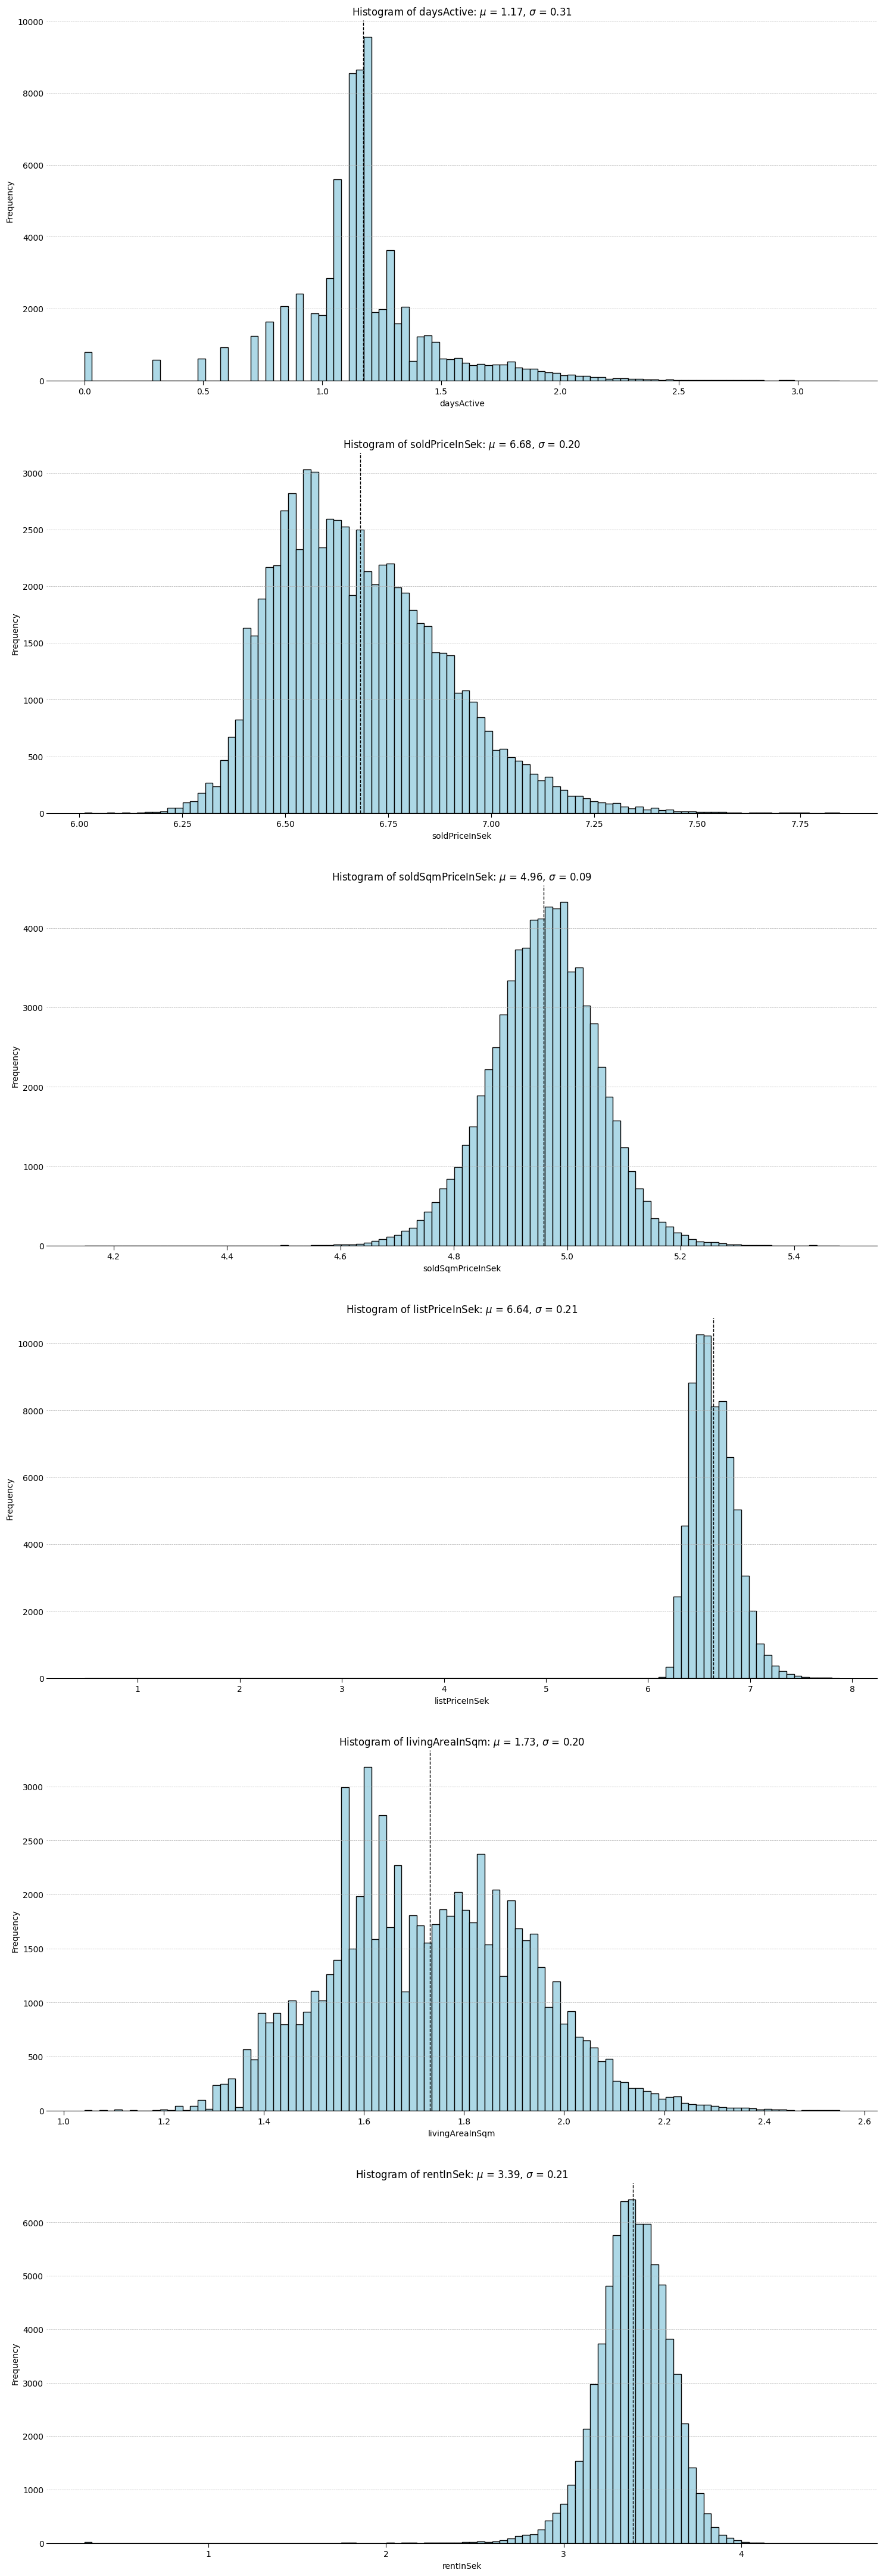

In [170]:
fig, axs = plt.subplots(nrows = 6, figsize = (18,55))

plot_distribution(df_values, "daysActive", axs[0])
plot_distribution(df_values, "soldPriceInSek", axs[1])
plot_distribution(df_values, "soldSqmPriceInSek", axs[2])
plot_distribution(df_values, "listPriceInSek", axs[3])
plot_distribution(df_values, "livingAreaInSqm", axs[4])
plot_distribution(df_values, "rentInSek", axs[5])

## Mergin Features

In [171]:
df_features = pd.merge(pd.merge(df_values, df_category, left_index = True, right_index = True), df_dates, left_index = True, right_index = True)
df_features.head()

,constructionYear,daysActive,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber,area_Birkastan,area_Birkastan Vasastan,area_Centrum,area_Centrum Norrmalm Vasastan,area_City,area_Ekhagen,area_Essingeöarna,area_Fredhäll,area_Fridhemsplan,area_Gamla Stan,area_Gärdet,area_Gårdshus,area_Hagamalm,area_Hagastaden,area_Hagastaden Vasastan,area_Hjorthagen,area_Hornsbergs Strand,area_Hornstull,area_Högalid,area_Högst,area_Katarina,area_Katarina/Sofia,area_Kristineberg,area_Kungsholmen,area_Kungsholmen Fredhäll,area_Kungsholmen Fridhemsplan,area_Kungsholmen Hornsbergs Strand,area_Kungsholmen Kristineberg,area_Kungsholmen Lilla Essingen,area_Kungsholmen Nedre,area_Kungsholmen Norr Mälarstrand,area_Kungsholmen Rådhuset,area_Kungsholmen Thorildsplan,area_Kungsholmen-Hornsbergs Strand,area_Lilla Essingen,area_Lilla Essingen - Kungsholmen,area_Lilla Essingen Kungsholmen,area_Maria,area_Maria/Gamla Stan/Högalid,area_Mariaberget,area_Mariatorget,area_Nedre Gärdet,area_Nedre Kungsholmen,area_Norr Mälarstrand,area_Norra Djurgården,area_Norra Djurgårdsstaden,area_Norrmalm,area_Odenplan,area_Reimersholme,area_Sabbatsberg/Atlas,area_Sibirien,area_Sofia,area_St Erik,area_St Göran,area_Stora Essingen,area_Södermalm,area_Södermalm Hornstull,area_Södermalm Högalid,area_Södermalm Katarina,area_Södermalm Maria,area_Södermalm Maria Magdalena,area_Södermalm SoFo,area_Södermalm Sofia,area_Södermalm-Högalid,area_Södermalm-Katarina,area_Södermalm-Maria,area_Södermalm-Sofia,area_Södermalm-Sofo,area_Thorildsplan,area_Tule,area_Tullgården,area_Vasastan,area_Vasastan - Birkastan,area_Vasastan - Odenplan,area_Vasastan Birkastan,area_Vasastan Norrmalm,area_Vasastan Odenplan,area_Vasastan Sibirien,area_Vasastan Östermalm,area_Östermalm,area_Östermalm / Gärdet,area_Östermalm / Nedre Gärdet,area_Östermalm Gärdet,area_Östra Kungsholmen,soldMonth,soldDayOfWeek,soldWeekOfYear,soldQuarter,marketDayOfWeek
booliId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1313807,1932.0,1.146128,59.336983,18.024736,6.324283,3.232742,4.756088,110000.0,5.5,6.301030,1.579784,1.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,2,48,4,3
1275300,1930.0,1.255273,59.338768,18.022543,6.302115,3.245513,4.824997,10000.0,0.5,6.299943,1.491362,1.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,6,40,4,3
1290019,1912.0,1.176091,59.330952,18.029498,6.599883,3.112605,4.814561,185000.0,4.9,6.579212,1.792392,2.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,2,43,4,2
1317787,1997.0,1.113943,59.333504,18.042007,6.568202,3.619824,4.726222,105000.0,2.9,6.555699,1.848189,2.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,2,49,4,4
1281194,1984.0,1.079181,59.314210,18.079580,6.531479,3.504471,4.760634,150000.0,4.6,6.511883,1.778151,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1,41,4,4


In [172]:
df_features.describe()

,constructionYear,daysActive,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber,area_Birkastan,area_Birkastan Vasastan,area_Centrum,area_Centrum Norrmalm Vasastan,area_City,area_Ekhagen,area_Essingeöarna,area_Fredhäll,area_Fridhemsplan,area_Gamla Stan,area_Gärdet,area_Gårdshus,area_Hagamalm,area_Hagastaden,area_Hagastaden Vasastan,area_Hjorthagen,area_Hornsbergs Strand,area_Hornstull,area_Högalid,area_Högst,area_Katarina,area_Katarina/Sofia,area_Kristineberg,area_Kungsholmen,area_Kungsholmen Fredhäll,area_Kungsholmen Fridhemsplan,area_Kungsholmen Hornsbergs Strand,area_Kungsholmen Kristineberg,area_Kungsholmen Lilla Essingen,area_Kungsholmen Nedre,area_Kungsholmen Norr Mälarstrand,area_Kungsholmen Rådhuset,area_Kungsholmen Thorildsplan,area_Kungsholmen-Hornsbergs Strand,area_Lilla Essingen,area_Lilla Essingen - Kungsholmen,area_Lilla Essingen Kungsholmen,area_Maria,area_Maria/Gamla Stan/Högalid,area_Mariaberget,area_Mariatorget,area_Nedre Gärdet,area_Nedre Kungsholmen,area_Norr Mälarstrand,area_Norra Djurgården,area_Norra Djurgårdsstaden,area_Norrmalm,area_Odenplan,area_Reimersholme,area_Sabbatsberg/Atlas,area_Sibirien,area_Sofia,area_St Erik,area_St Göran,area_Stora Essingen,area_Södermalm,area_Södermalm Hornstull,area_Södermalm Högalid,area_Södermalm Katarina,area_Södermalm Maria,area_Södermalm Maria Magdalena,area_Södermalm SoFo,area_Södermalm Sofia,area_Södermalm-Högalid,area_Södermalm-Katarina,area_Södermalm-Maria,area_Södermalm-Sofia,area_Södermalm-Sofo,area_Thorildsplan,area_Tule,area_Tullgården,area_Vasastan,area_Vasastan - Birkastan,area_Vasastan - Odenplan,area_Vasastan Birkastan,area_Vasastan Norrmalm,area_Vasastan Odenplan,area_Vasastan Sibirien,area_Vasastan Östermalm,area_Östermalm,area_Östermalm / Gärdet,area_Östermalm / Nedre Gärdet,area_Östermalm Gärdet,area_Östra Kungsholmen,soldMonth,soldDayOfWeek,soldWeekOfYear,soldQuarter,marketDayOfWeek
count,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,7.231000e+04,7.231000e+04,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.00000,72310.000000,72310.000000,72310.000000,72310.000000
mean,1934.654031,1.172712,59.331957,18.052754,6.681628,3.391549,4.958622,4.614881e+05,1.877872e+03,6.638256,1.732000,2.263719,2.973127,0.008450,0.002296,0.001964,0.000968,0.001010,0.001881,0.009556,0.008090,0.001839,0.002531,0.043258,0.000913,0.001701,0.002503,0.000705,0.008878,0.002517,0.007758,0.008892,0.000899,0.016028,0.001093,0.004854,0.190375,0.001286,0.005518,0.000733,0.000802,0.001037,0.001480,0.000816,0.000899,0.001895,0.002296,0.006292,0.000954,0.003540,0.006071,0.000691,0.000830,0.002074,0.008782,0.002807,0.000788,0.003997,0.008547,0.009584,0.000747,0.001950,0.001148,0.001106,0.006237,0.001065,0.001825,0.003444,0.167446,0.00

## Get Location Data Using GeoPy

In [173]:
# geolocator = Nominatim(user_agent = "booli_feature_engineering")
# reverse = RateLimiter(geolocator.reverse, min_delay_seconds = 0.1)

# df_clean["Location"] = df_clean.apply(lambda row: reverse(f"{row.latitude}, {row.longitude}"), axis = 1)
# df_clean.head()

In [174]:
# geolocator = Nominatim(user_agent = "booli_feature_engineering")

# df_clean["Location"] = df_clean.streetAddress.apply(geolocator.geocode)
# df_clean.head()

## Replace Outliers

In [175]:
def replace_outliers_with_mean_using_IQR(df):
    df_copy = df.copy(deep = True)
    df_copy.dropna(inplace = True)
    
    for col in df.select_dtypes(include = np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape
        mean = df_copy[(df[col] > lower_bound) | (df[col] < upper_bound)][col].mean()
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = mean

        print(f'Replaced {outliers[0]} from column: {col}')

    return df

df_features = replace_outliers_with_mean_using_IQR(df_features)

Replaced 5862 from column: constructionYear
Replaced 7785 from column: daysActive
Replaced 0 from column: latitude
Replaced 2 from column: longitude
Replaced 207 from column: soldPriceInSek
Replaced 420 from column: rentInSek
Replaced 195 from column: soldSqmPriceInSek
Replaced 1955 from column: soldPriceVsListPriceDiffInSek
Replaced 196 from column: soldPriceVsListPriceDiffInPercentage
Replaced 194 from column: listPriceInSek
Replaced 16 from column: livingAreaInSqm
Replaced 593 from column: numberOfRooms
Replaced 679 from column: floorNumber
Replaced 611 from column: area_Birkastan
Replaced 166 from column: area_Birkastan Vasastan
Replaced 142 from column: area_Centrum
Replaced 70 from column: area_Centrum Norrmalm Vasastan
Replaced 73 from column: area_City
Replaced 136 from column: area_Ekhagen
Replaced 691 from column: area_Essingeöarna
Replaced 585 from column: area_Fredhäll
Replaced 133 from column: area_Fridhemsplan
Replaced 183 from column: area_Gamla Stan
Replaced 3128 from c

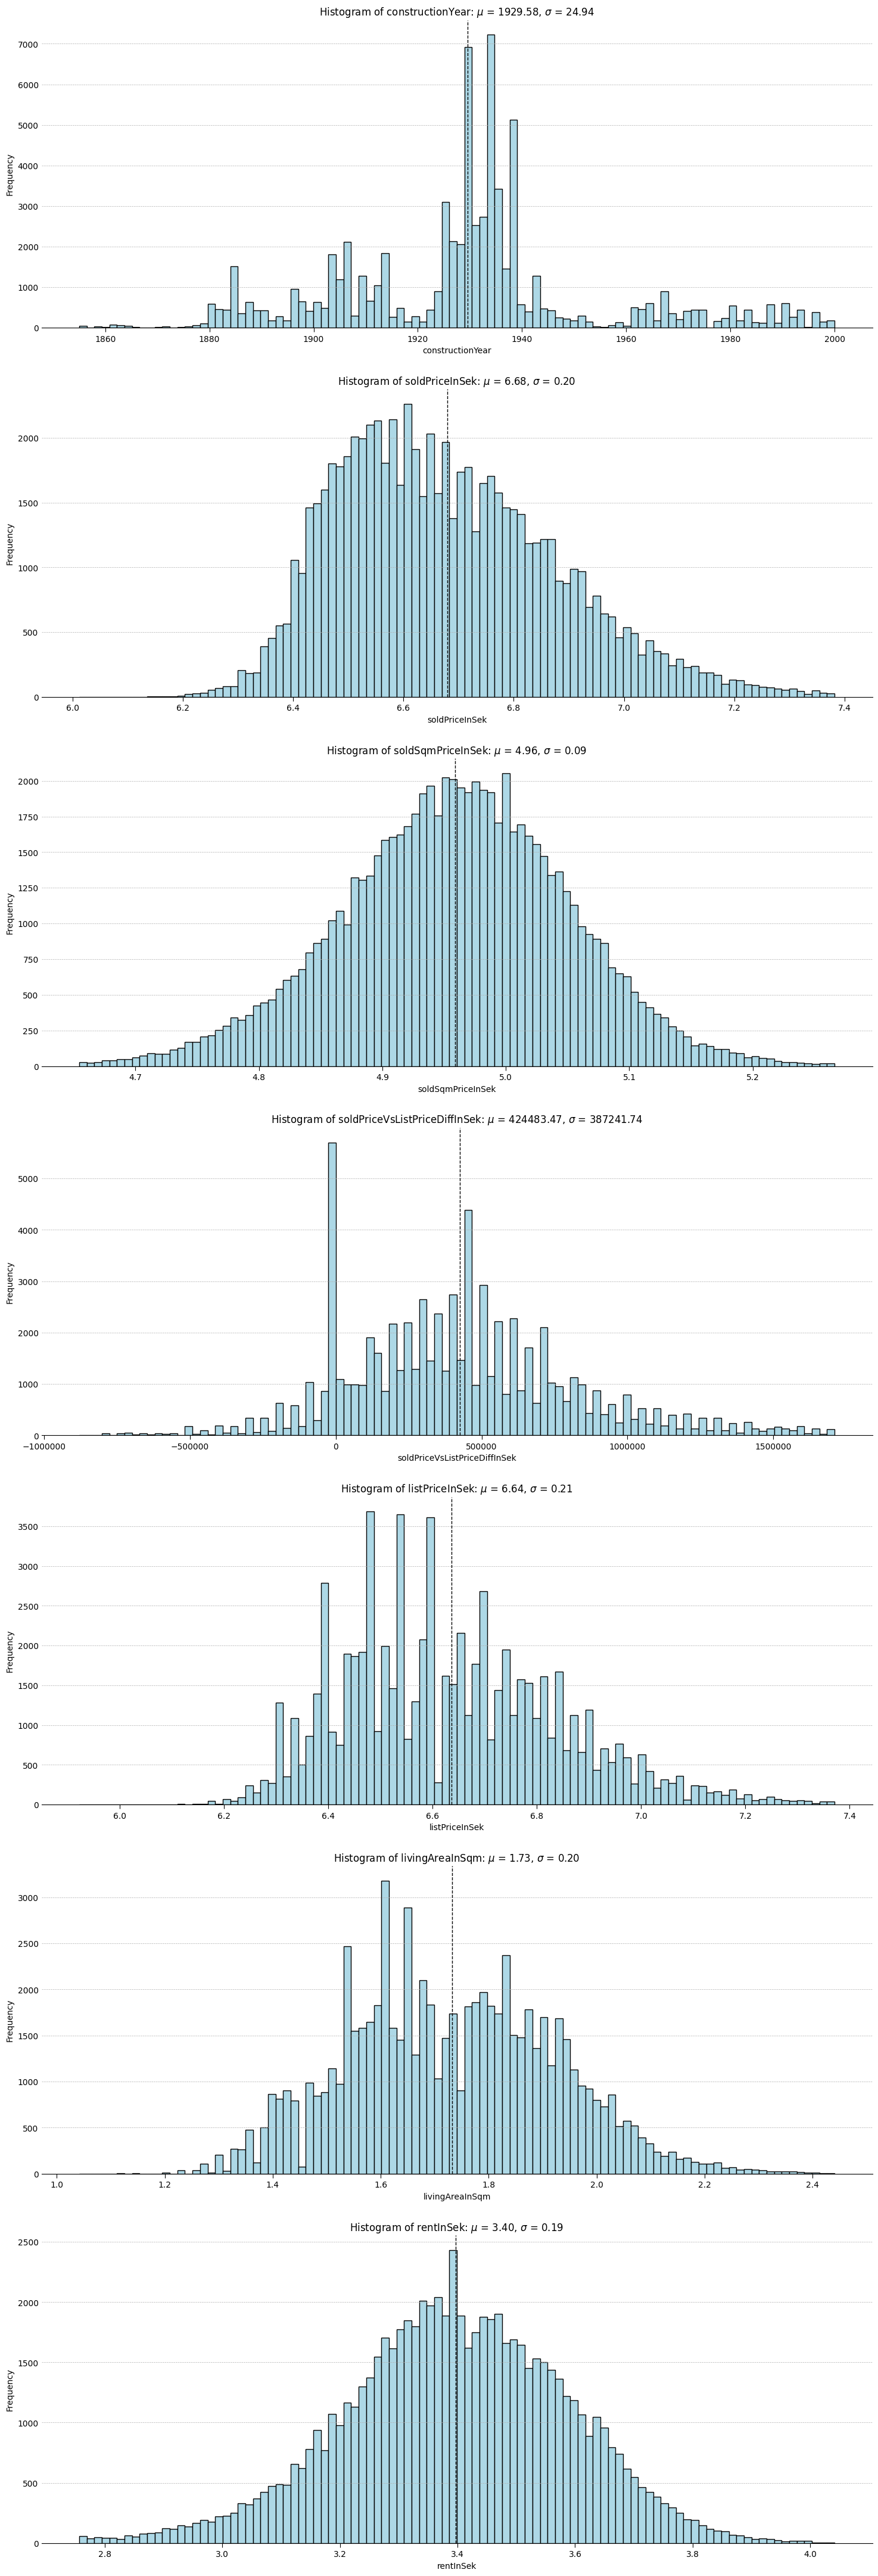

In [176]:
fig, axs = plt.subplots(nrows = 7, figsize = (18,55))
plot_distribution(df_features, "constructionYear", axs[0])
plot_distribution(df_features, "soldPriceInSek", axs[1])
plot_distribution(df_features, "soldSqmPriceInSek", axs[2])
plot_distribution(df_features, "soldPriceVsListPriceDiffInSek", axs[3])
plot_distribution(df_features, "listPriceInSek", axs[4])
plot_distribution(df_features, "livingAreaInSqm", axs[5])
plot_distribution(df_features, "rentInSek", axs[6])

## Remove Features Based on VIF

In [177]:
def get_feature_vif(df):
    X = add_constant(df)
    df_vif = pd.DataFrame(X.columns, columns = ["Feature"])
    df_vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return df_vif

df_vif = get_feature_vif(df_features)
df_vif.head()

,Feature,VIF
0,const,2.087577e+08
1,constructionYear,1.296765e+00
2,daysActive,1.184096e+00
3,latitude,9.708440e+00
4,longitude,4.404348e+00


In [178]:
vif_cols = df_vif[(df_vif.VIF >= 10) & (~df_vif.Feature.isin(["const", "soldPriceInSek", "listPriceInSek", "livingAreaInSqm"]))]["Feature"]
vif_cols

98          soldMonth
100    soldWeekOfYear
101       soldQuarter
Name: Feature, dtype: object

In [179]:
df_features = df_features.drop(columns = vif_cols)
df_features.head()

,constructionYear,daysActive,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber,area_Birkastan,area_Birkastan Vasastan,area_Centrum,area_Centrum Norrmalm Vasastan,area_City,area_Ekhagen,area_Essingeöarna,area_Fredhäll,area_Fridhemsplan,area_Gamla Stan,area_Gärdet,area_Gårdshus,area_Hagamalm,area_Hagastaden,area_Hagastaden Vasastan,area_Hjorthagen,area_Hornsbergs Strand,area_Hornstull,area_Högalid,area_Högst,area_Katarina,area_Katarina/Sofia,area_Kristineberg,area_Kungsholmen,area_Kungsholmen Fredhäll,area_Kungsholmen Fridhemsplan,area_Kungsholmen Hornsbergs Strand,area_Kungsholmen Kristineberg,area_Kungsholmen Lilla Essingen,area_Kungsholmen Nedre,area_Kungsholmen Norr Mälarstrand,area_Kungsholmen Rådhuset,area_Kungsholmen Thorildsplan,area_Kungsholmen-Hornsbergs Strand,area_Lilla Essingen,area_Lilla Essingen - Kungsholmen,area_Lilla Essingen Kungsholmen,area_Maria,area_Maria/Gamla Stan/Högalid,area_Mariaberget,area_Mariatorget,area_Nedre Gärdet,area_Nedre Kungsholmen,area_Norr Mälarstrand,area_Norra Djurgården,area_Norra Djurgårdsstaden,area_Norrmalm,area_Odenplan,area_Reimersholme,area_Sabbatsberg/Atlas,area_Sibirien,area_Sofia,area_St Erik,area_St Göran,area_Stora Essingen,area_Södermalm,area_Södermalm Hornstull,area_Södermalm Högalid,area_Södermalm Katarina,area_Södermalm Maria,area_Södermalm Maria Magdalena,area_Södermalm SoFo,area_Södermalm Sofia,area_Södermalm-Högalid,area_Södermalm-Katarina,area_Södermalm-Maria,area_Södermalm-Sofia,area_Södermalm-Sofo,area_Thorildsplan,area_Tule,area_Tullgården,area_Vasastan,area_Vasastan - Birkastan,area_Vasastan - Odenplan,area_Vasastan Birkastan,area_Vasastan Norrmalm,area_Vasastan Odenplan,area_Vasastan Sibirien,area_Vasastan Östermalm,area_Östermalm,area_Östermalm / Gärdet,area_Östermalm / Nedre Gärdet,area_Östermalm Gärdet,area_Östra Kungsholmen,soldDayOfWeek,marketDayOfWeek
booliId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1313807,1932.0,1.146128,59.336983,18.024736,6.324283,3.232742,4.756088,110000.0,5.5,6.301030,1.579784,1.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,3.0
1275300,1930.0,1.255273,59.338768,18.022543,6.302115,3.245513,4.824997,10000.0,0.5,6.299943,1.491362,1.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,3.0
1290019,1912.0,1.176091,59.330952,18.029498,6.599883,3.112605,4.814561,185000.0,4.9,6.579212,1.792392,2.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0
1317787,1997.0,1.113943,59.333504,18.042007,6.568202,3.619824,4.726222,105000.0,2.9,6.555699,1.848189,2.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,4.0
1281194,1984.0,1.079181,59.314210,18.079580,6.531479,3.504471,4.760634,150000.0,4.6,6.511883,1.778151,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,4.0


# 2. Saving Feature Data to Pickle

In [180]:
# parquet_file = df.to_parquet(index = False)
# azure_utils.upload_csv_to_datalake(df, f"silver/sold_clean", f"Sold_{date.today()}.csv")
df_features.to_pickle("features.pkl")